In [1]:
import torch 
import numpy as np

## Introduction of weight matrices 

$W_q$-> Query weight matrix

$W_k$ -> Key weight matrix 

$W_v$ -> Value weight matrix

These are updated during model training. These trainable weight matrices are crucial so that the model (specifically, the attention module inside the model) can learn to produce
“good” context vectors.

These three matrices are used to project the embedded input tokens, $x^{(i)}$, into query, key, and value vectors, respectively.

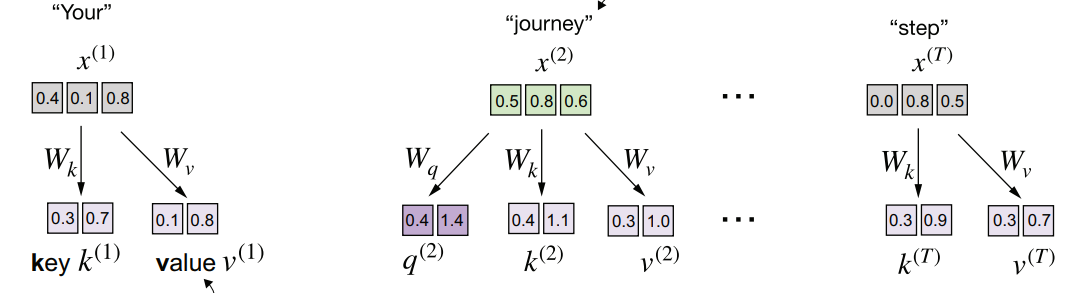

$x^{(2)}$ is the selected query

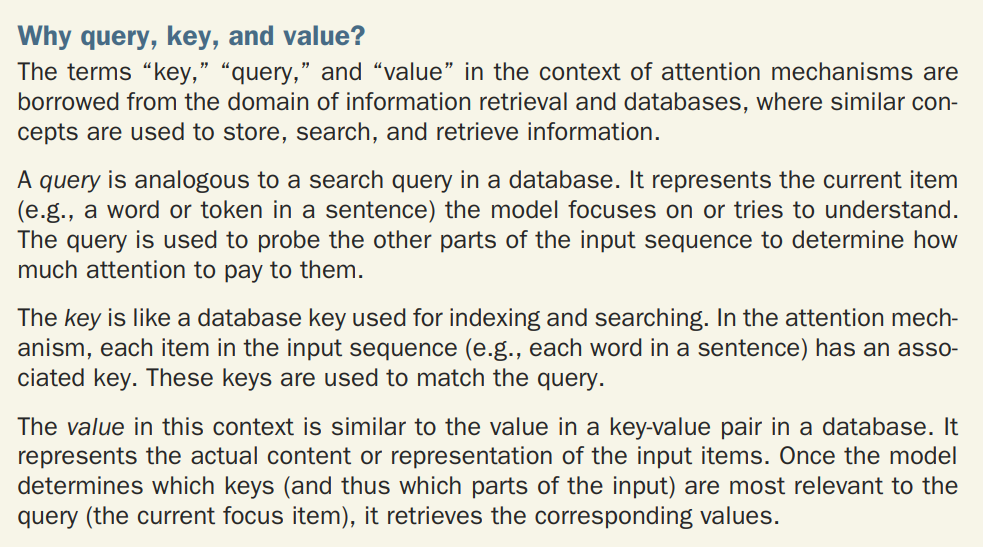

In [2]:
inputs = torch.tensor(
 [[0.43, 0.15, 0.89], # Your (x^1)
 [0.55, 0.87, 0.66], # journey (x^2)
 [0.57, 0.85, 0.64], # starts (x^3)
 [0.22, 0.58, 0.33], # with (x^4)
 [0.77, 0.25, 0.10], # one (x^5)
 [0.05, 0.80, 0.55]] # step (x^6)
)

In [5]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2
d_in, d_out

(3, 2)

3

We specify the output dimension of the embedding to be 2 

In [ ]:
d_out = 2

In [ ]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

'''
We set requires_grad=False to reduce clutter in the outputs, but if we were to use
the weight matrices for model training, we would set requires_grad=True to update
these matrices during model training.
'''

In [7]:
W_query, W_key, W_value

(Parameter containing:
 tensor([[0.2961, 0.5166],
         [0.2517, 0.6886],
         [0.0740, 0.8665]]),
 Parameter containing:
 tensor([[0.1366, 0.1025],
         [0.1841, 0.7264],
         [0.3153, 0.6871]]),
 Parameter containing:
 tensor([[0.0756, 0.1966],
         [0.3164, 0.4017],
         [0.1186, 0.8274]]))

## Computation of Key, Query and Value matrices

In [ ]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
query_2, key_2, value_2
# The output for the query results in a two-dimensional vector since we set the number
# of columns of the corresponding weight matrix, via d_out, to 2:

(tensor([0.4306, 1.4551]), tensor([0.4433, 1.1419]), tensor([0.3951, 1.0037]))

For the entire Input:

In [11]:
keys = inputs @ W_key
values = inputs @ W_value
queries = inputs @ W_query
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)
print("queries.shape:", queries.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])
queries.shape: torch.Size([6, 2])


## Computation of Attention Scores
To find the context vector $z^{(2)}$ we need attention scores for query $q^{(2)}$
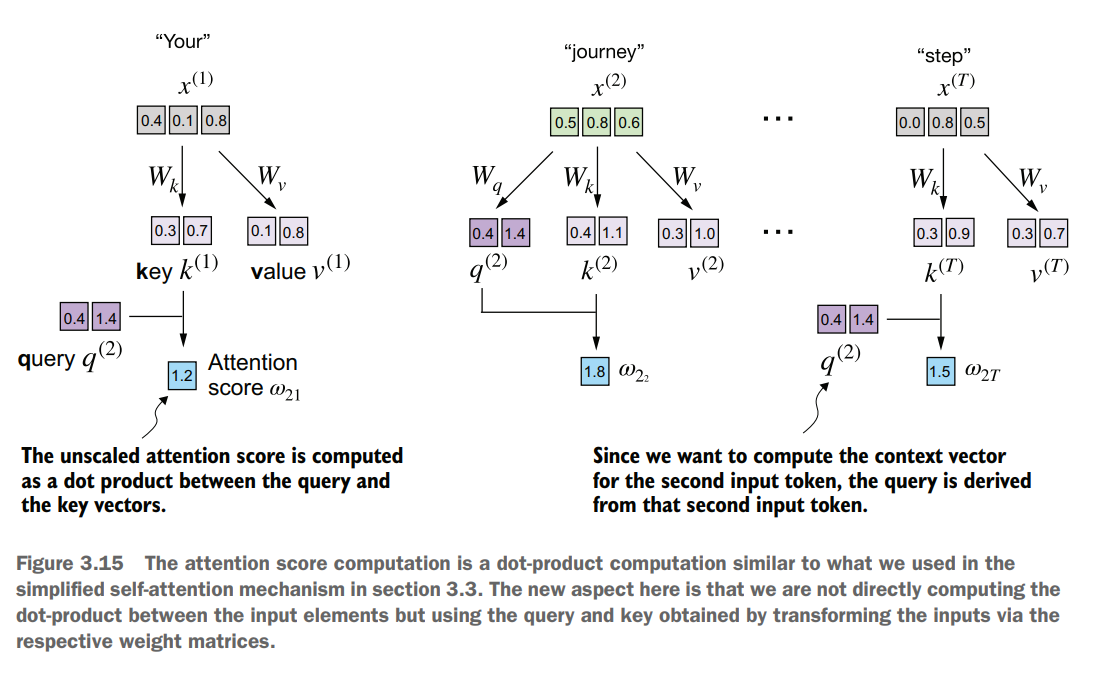

In [12]:
keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [13]:
# For all attention scores
attn_scores_2 = query_2 @ keys.T
print("attn_scores_2.shape:", attn_scores_2.shape)
attn_scores_2

attn_scores_2.shape: torch.Size([6])


tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])

In [14]:
# Attention scores for all queries
attn_scores = queries @ keys.T
print("attn_scores.shape:", attn_scores.shape)
attn_scores

attn_scores.shape: torch.Size([6, 6])


tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])

Now, we calculate attention weights from these attention scores. To do this we:
1. Scale them by square root of embedding dimension of keys
2. Apply softmax
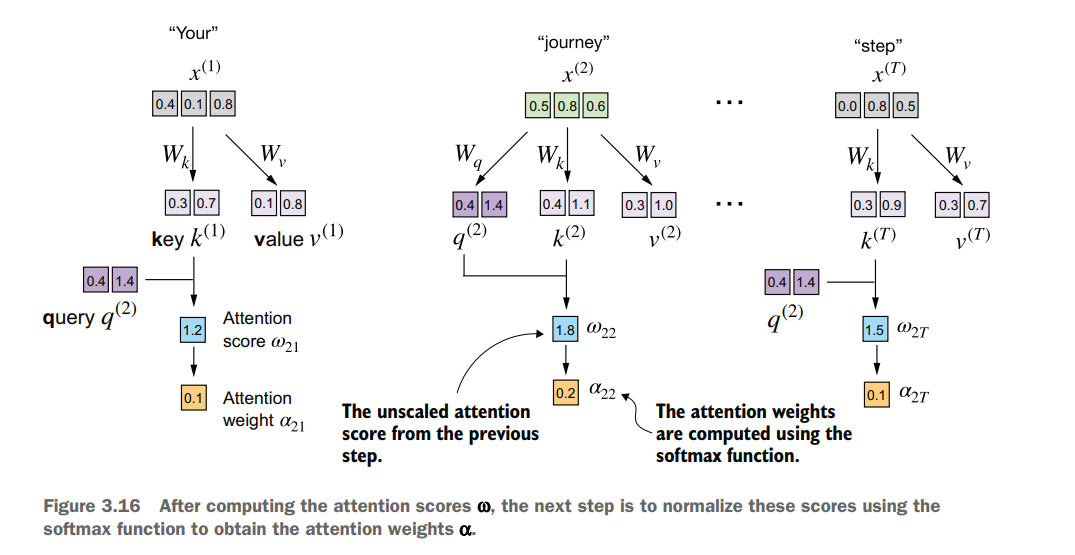

In [18]:
d_k = keys.shape[-1]
print(d_k)
attn_weights_2 = torch.softmax(attn_scores_2/d_k**0.5, dim=-1)
print(attn_weights_2)

2
tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [19]:
attn_weights = torch.softmax(attn_scores/np.sqrt(d_k), dim = -1)
print(attn_weights)

tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])


## Calculation of Context vector
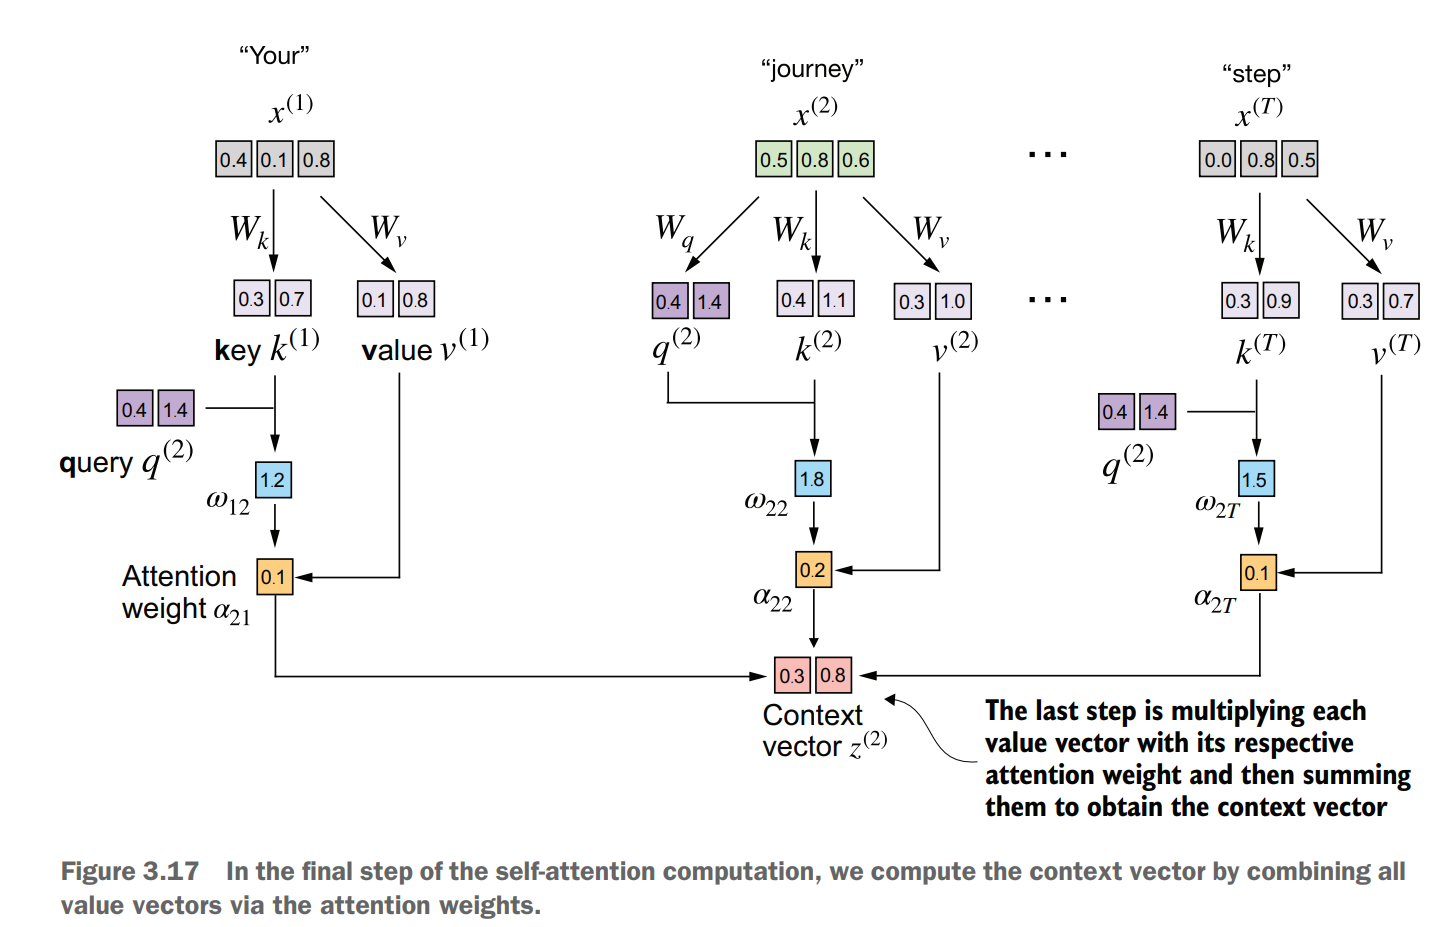

In [ ]:
print(attn_weights_2.shape, attn_weights.shape, values.shape)
context_vec_2 = attn_weights_2 @ values
print(context_vec_2.shape, context_vec_2)



torch.Size([6]) torch.Size([6, 6]) torch.Size([6, 2])
torch.Size([2]) tensor([0.3061, 0.8210])


In [24]:
context_vec = attn_weights @ values
print(context_vec.shape, context_vec)

torch.Size([6, 2]) tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


## A compact self-attention class

In [25]:
import torch.nn as nn

In [26]:
class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
    
    def forward(self, x):
        '''
        The method returns the context vector as output.
        The context vector is a weighted sum of the values, where the weights are determined
        by the attention scores. The attention scores are computed by taking the dot product
        of the queries and keys, and then applying the softmax function to obtain the attention
        weights. The context vector is then computed by multiplying the attention weights with
        the values. 
        '''
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value

        attn_scores = queries @ keys.T
        d_k = keys.shape[-1]
        attn_weights = torch.softmax(attn_scores/np.sqrt(d_k), dim = -1)
        context_vec = attn_weights @ values
        return context_vec


The forward method of the SelfAttention_v1 class takes a tensor x as input and computes
the attention scores, weights, and context vectors using the weight matrices W_query,
W_key, and W_value. 
The context vector is a representation of the input sequence that captures the
relationships between the elements in the sequence, based on the attention mechanism.
The context vector can be used as input to subsequent layers in a neural network,
such as a feedforward layer or a recurrent layer, to perform further processing
and make predictions.

In [28]:
'''
We can improve the SelfAttention_v1 implementation further by utilizing
PyTorch’s nn.Linear layers, which effectively perform matrix multiplication when
the bias units are disabled. Additionally, a significant advantage of using nn.Linear
instead of manually implementing nn.Parameter(torch.rand(...)) is that nn.Linear
has an optimized weight initialization scheme, contributing to more stable and
effective model training
'''

class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias = False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    
    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        d_k = keys.shape[-1]
        attn_weights = torch.softmax(attn_scores/np.sqrt(d_k), dim = -1)
        context_vec = attn_weights @ values
        return context_vec
# The qkv_bias parameter allows for the inclusion of bias
# terms in the linear transformations, which can further enhance the model's expressiveness.
# The forward method computes the attention scores, applies the softmax function to obtain
# the attention weights, and finally computes the context vector as a weighted sum of the
# values, similar to the previous implementation.

In [30]:
d_in, d_out

(3, 2)

In [31]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)
tensor([[0.5085, 0.3508],
        [0.5084, 0.3508],
        [0.5084, 0.3506],
        [0.5074, 0.3471],
        [0.5076, 0.3446],
        [0.5077, 0.3493]], grad_fn=<MmBackward0>)


In [ ]:
print(sa_v1.W_key, sa_v1.W_query, sa_v1.W_value)
print(sa_v2.W_key.weight, sa_v2.W_query.weight, sa_v2.W_value.weight)

Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]], requires_grad=True) Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]], requires_grad=True) Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]], requires_grad=True)
Parameter containing:
tensor([[-0.2604,  0.1829, -0.2569],
        [ 0.4126,  0.4611, -0.5323]], requires_grad=True) Parameter containing:
tensor([[-0.1362,  0.1853,  0.4083],
        [ 0.1076,  0.1579,  0.5573]], requires_grad=True) Parameter containing:
tensor([[ 0.4929,  0.2757,  0.2516],
        [ 0.2377,  0.4800, -0.0762]], requires_grad=True)


We see that the Linear layer stores weight matrix in a transposed form